## Data import and clean
California housing dataset from https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('houses.csv', sep = ',')
# display(df.dtypes)
display(df.shape)
df.info()
display(df)

(1460, 81)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


## handle column SalePriceRange

In [3]:
df1 = df
sizes=[0,0,0,0]
for i, price in enumerate(df1['SalePrice']):
    if price < 100000:
       df1.loc[i,'SalePriceRange'] = 'SalePrice < 100k'
       sizes[0]+=1
    elif 100000 <= price < 200000:
       df1.loc[i,'SalePriceRange'] = 'SalePrice >= 100k'
       sizes[1]+=1
    elif 200000 <= price < 300000:
       df1.loc[i,'SalePriceRange'] = 'SalePrice >= 200k'
       sizes[2]+=1
    else:
       df1.loc[i,'SalePriceRange'] = 'SalePrice >= 300k'  
       sizes[3]+=1
display(df1)
print(sizes)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SalePriceRange
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,SalePrice >= 200k
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,SalePrice >= 100k
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,SalePrice >= 200k
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,SalePrice >= 100k
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,SalePrice >= 200k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,8,2007,WD,Normal,175000,SalePrice >= 100k
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000,SalePrice >= 200k
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500,SalePrice >= 200k
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,4,2010,WD,Normal,142125,SalePrice >= 100k


[114, 911, 320, 115]


## Data visualization

Draw a pie chart to find out the ratio of house prices

([<matplotlib.patches.Wedge at 0x165137b5c70>,
 [Text(1.067070316400707, 0.2671346848623279, 'SalePrice < 100k'),
  Text(-0.8478662091086893, 0.7008016063420949, 'SalePrice >= 100k'),
  Text(0.41547868726481674, -1.0185172852871496, 'SalePrice >= 200k'),
  Text(1.0664930070187955, -0.26943026181186036, 'SalePrice >= 300k')],
 [Text(0.5820383544003855, 0.14570982810672428, '7.8%'),
  Text(-0.46247247769564864, 0.3822554216411426, '62.4%'),
  Text(0.22662473850808182, -0.5555548828838996, '21.9%'),
  Text(0.5817234583738884, -0.14696196098828745, '7.9%')])

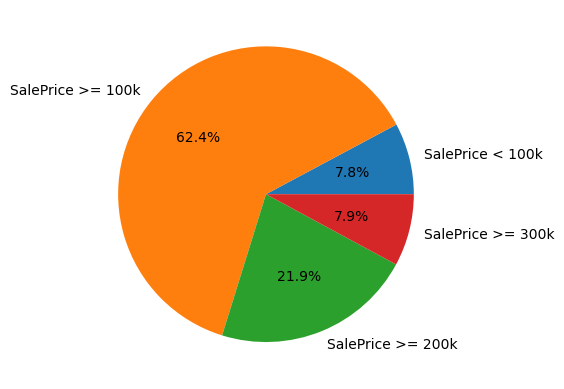

In [4]:
import matplotlib.pyplot as plt
import numpy as np
labels = 'SalePrice < 100k', 'SalePrice >= 100k','SalePrice >= 200k','SalePrice >= 300k'
fig, ax = plt.subplots()
ax.pie(sizes,labels = labels,autopct='%1.1f%%')

Plot out the quantity of the houses that sold over >=300k vs <100k every year
# 2007以前>300k的房子賣比較多

C:\Users\jeffrey\AppData\Local\Temp\ipykernel_19360\1612635018.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_300k['quantity']=1
C:\Users\jeffrey\AppData\Local\Temp\ipykernel_19360\1612635018.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_100k['quantity']=1


Text(0.5, 1.0, 'Quantity of sold houses every year')

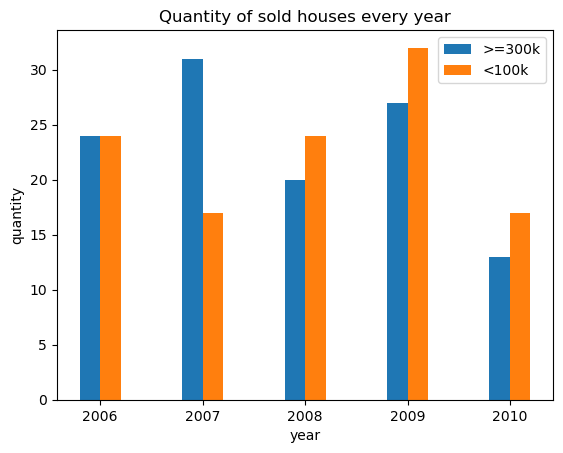

In [5]:
df_300k = df1[df1['SalePriceRange'] == 'SalePrice >= 300k']
df_100k = df1[df1['SalePriceRange'] == 'SalePrice < 100k']
df_300k['quantity']=1
df_100k['quantity']=1
df_300k = df_300k.groupby(df_300k['YrSold']).sum()
df_100k = df_100k.groupby(df_100k['YrSold']).sum()
x = df_300k['quantity'].index
x_axis = np.arange(len(x))
y = df_300k['quantity']
z = df_100k['quantity']
plt.bar(x_axis-0.1,y,0.2,label = '>=300k')
plt.bar(x_axis+0.1,z,0.2,label = '<100k')
plt.xticks(x_axis,x)
plt.xlabel("year")
plt.ylabel("quantity")
plt.legend()
plt.title("Quantity of sold houses every year")

ground living area / saleprice

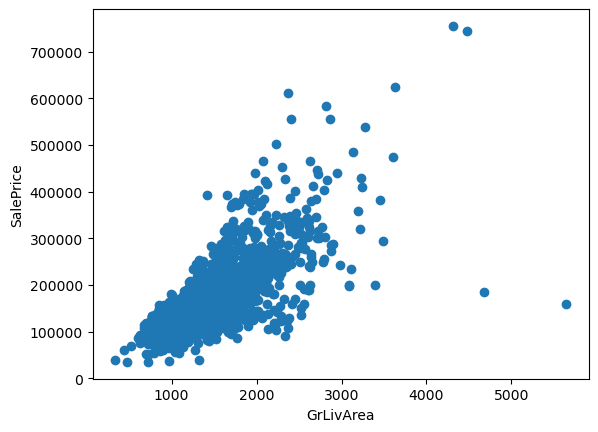

In [6]:
fig, ax = plt.subplots(1,1)
ax.scatter(df['GrLivArea'],df['SalePrice'])
plt.ylabel('SalePrice', fontsize=10)
plt.xlabel('GrLivArea', fontsize=10)
plt.show()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


c:\Users\jeffrey\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

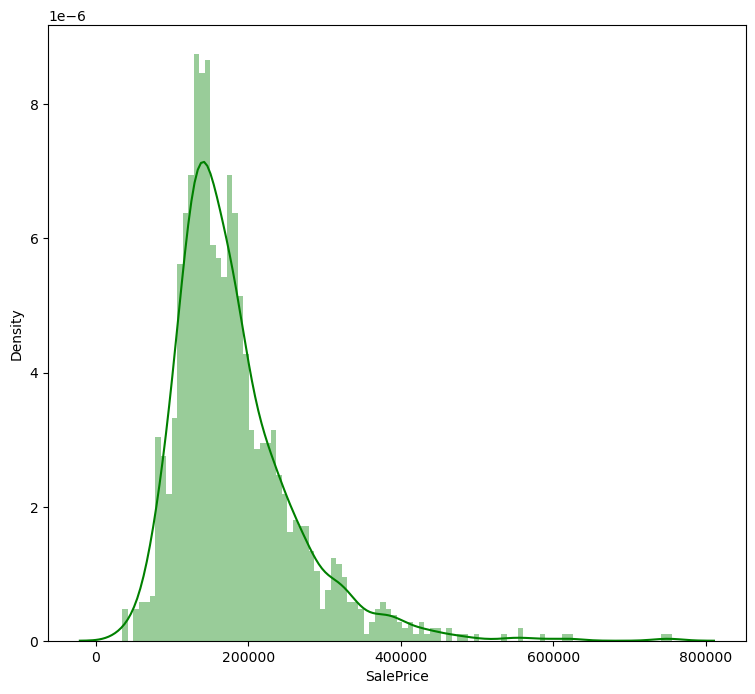

In [7]:
import seaborn as sns
print(df['SalePrice'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4})

In [9]:
pd.pivot_table(df, index='LandContour',columns='SaleType' ,values='SalePriceRange',aggfunc ='count')

SaleType,COD,CWD,Con,ConLD,ConLI,ConLw,New,Oth,WD
LandContour,,,,,,,,,
Bnk,1.0,NaN,NaN,1.0,NaN,1.0,2.0,NaN,58.0
HLS,NaN,NaN,NaN,NaN,NaN,NaN,11.0,NaN,39.0
Low,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,34.0
Lvl,41.0,4.0,2.0,7.0,5.0,4.0,109.0,3.0,1136.0


# feature engineering

In [ ]:
df1.dropna(axis=1, how='any', thresh=None, subset=None, inplace=False)
df1 = df1.drop('Id',1)
df1 = df1.drop('YrSold',1)
df1 = df1.drop('PoolQC',1)
df1 = df1.drop('Fence',1)
df1 = df1.drop('MiscFeature',1)

display(df1)

C:\Users\jeffrey\AppData\Local\Temp\ipykernel_6776\2177506087.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df1 = df1.drop('Id',1)
C:\Users\jeffrey\AppData\Local\Temp\ipykernel_6776\2177506087.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df1 = df1.drop('YrSold',1)
C:\Users\jeffrey\AppData\Local\Temp\ipykernel_6776\2177506087.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df1 = df1.drop('PoolQC',1)
C:\Users\jeffrey\AppData\Local\Temp\ipykernel_6776\2177506087.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df1 = df1.drop('Fence',1)
C:\Users\jeffrey\AppData\Local\Temp\ipykernel_6776\2177506087.py:6: FutureWarning: In a f

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,SalePriceRange
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,WD,Normal,208500,SalePrice >= 200k
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,WD,Normal,181500,SalePrice >= 100k
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,WD,Normal,223500,SalePrice >= 200k
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,WD,Abnorml,140000,SalePrice >= 100k
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,WD,Normal,250000,SalePrice >= 200k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,WD,Normal,175000,SalePrice >= 100k
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,WD,Normal,210000,SalePrice >= 200k
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,WD,Normal,266500,SalePrice >= 200k
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,WD,Normal,142125,SalePrice >= 100k


In [ ]:
# Data preprocessing
# label encoding
for i,name in enumerate(df1.columns):
    c = f'c{i}'
    c = df1[name].astype('category')
    df1[name] = c.cat.codes
    if name == 'SalePriceRange':
        d_SalePrices = dict(enumerate(c.cat.categories))
        print(d_SalePrices)
display(df1)

{0: 'SalePrice < 100k', 1: 'SalePrice >= 100k', 2: 'SalePrice >= 200k', 3: 'SalePrice >= 300k'}


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,SalePriceRange
0,5,3,36,327,1,-1,3,3,0,4,...,0,0,0,0,0,1,8,4,412,2
1,0,3,51,498,1,-1,3,3,0,2,...,0,0,0,0,0,4,8,4,339,1
2,5,3,39,702,1,-1,0,3,0,4,...,0,0,0,0,0,8,8,4,442,2
3,6,3,31,489,1,-1,0,3,0,0,...,108,0,0,0,0,1,8,0,194,1
4,5,3,55,925,1,-1,0,3,0,2,...,0,0,0,0,0,11,8,4,494,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,5,3,33,267,1,-1,3,3,0,4,...,0,0,0,0,0,7,8,4,314,1
1456,0,3,56,866,1,-1,3,3,0,4,...,0,0,0,0,0,1,8,4,415,2
1457,6,3,37,415,1,-1,3,3,0,4,...,0,0,0,0,17,4,8,4,527,2
1458,0,3,39,505,1,-1,3,3,0,4,...,38,0,0,0,0,3,8,4,199,1


In [ ]:
# features matrix and target array from label encoding
x = df1.drop('SalePriceRange', axis=1)
y = df1['SalePriceRange']
print(x.shape)
print(y.shape)

(1460, 76)
(1460,)


# model selection

[[ 29   1   0   0]
 [  0 186   0   0]
 [  0   2  49   2]
 [  0   0   1  22]]
acc: 0.9794520547945206
                   precision    recall  f1-score   support

 SalePrice < 100K       1.00      0.97      0.98        30
SalePrice >= 100k       0.98      1.00      0.99       186
SalePrice >= 200k       0.98      0.92      0.95        53
SalePrice >= 300k       0.92      0.96      0.94        23

         accuracy                           0.98       292
        macro avg       0.97      0.96      0.97       292
     weighted avg       0.98      0.98      0.98       292



Text(42.249999999999986, 0.5, 'true label')

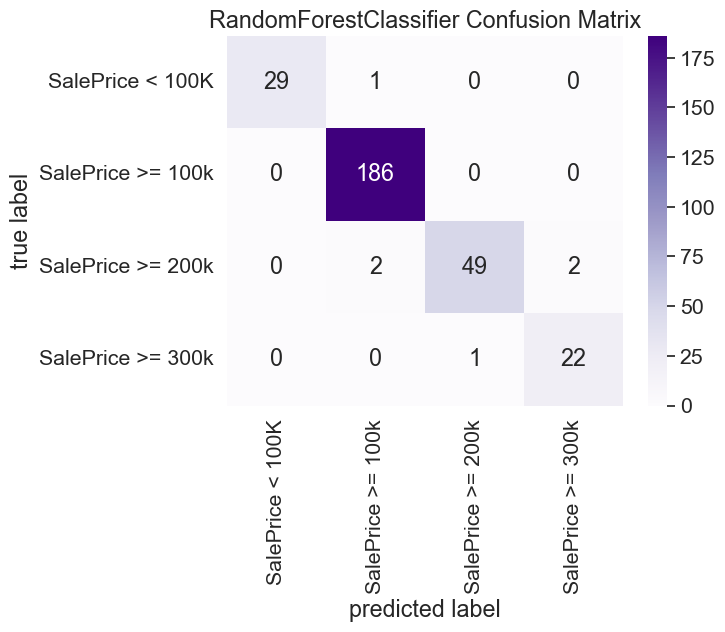

In [ ]:
# train test split
from sklearn.model_selection import train_test_split
#train, test = train_test_split(df1, test_size=0.2, random_state=1)
xtrain, xtest, ytrain, ytest = train_test_split( x, y,test_size=0.2,
                                                random_state=1)
# Try RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(max_depth = 15) #set model parameters max_depth = The maximum depth of the tree, the bigger the better classification
clf.fit(xtrain,ytrain)
y_pred=clf.predict(xtest)

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
conf_mx1 = confusion_matrix(ytest, y_pred)
print(confusion_matrix(ytest, y_pred))
print("acc:",accuracy_score(ytest, y_pred))

# RandomForestClassifier classification report 
from sklearn.metrics import classification_report
y1_true = ytest
target_names = ['SalePrice < 100K','SalePrice >= 100k', 'SalePrice >= 200k', 'SalePrice >= 300k']
print(classification_report(y1_true, y_pred, target_names=target_names))

# plot confusion matrix 
import seaborn as sns
import matplotlib.pyplot as plt
plt.title("RandomForestClassifier Confusion Matrix")
labels = ['SalePrice < 100K','SalePrice >= 100k', 'SalePrice >= 200k', 'SalePrice >= 300k'] 
sns.set(font_scale=1.4)
ax1=sns.heatmap(conf_mx1,annot=True,cmap="Purples",fmt="d",cbar=True, xticklabels=labels, yticklabels=labels)
ax1.set_xlabel('predicted label')
ax1.set_ylabel('true label')


In [ ]:
# feature importances
print(clf.feature_importances_)
print("")

feature_name = list(xtrain.columns)
feature_dict = {}
for i ,feature in enumerate(feature_name):
    feature_dict[feature] = clf.feature_importances_[i]

feature_import = [(v,k) for k,v in feature_dict.items()]
feature_import = sorted(feature_import, reverse = True) #reverse = True, returns a list in descending order 
for i in range(len(feature_name)):
    print('rank:{:2d}  score: {:.5f}  feature: {:s}'.format(i+1, feature_import[i][0], feature_import[i][1]))
    

[6.45946095e-03 3.10911298e-03 1.13032019e-02 2.32289823e-02
 2.42531744e-04 1.43754013e-03 1.68455351e-03 1.70026042e-03
 0.00000000e+00 1.80797387e-03 1.06175921e-03 1.15165530e-02
 2.24923771e-03 5.37686439e-04 3.03887370e-03 3.37771803e-03
 6.34050222e-02 9.65249051e-03 2.22288751e-02 1.51973551e-02
 3.43635221e-03 5.13082768e-04 5.36343199e-03 4.46429370e-03
 2.81188204e-03 8.87098671e-03 3.02595389e-02 1.72971053e-03
 5.98783187e-03 1.72487225e-02 2.46820562e-03 4.71643644e-03
 4.55662734e-03 2.16621158e-02 1.65494639e-03 1.46670100e-03
 1.04626905e-02 4.30005988e-02 2.01414330e-03 5.09496857e-03
 7.77206968e-03 1.16739360e-03 3.77523033e-02 2.02381031e-02
 2.98539774e-04 6.49234072e-02 2.65890956e-03 4.36108489e-04
 1.01758012e-02 2.07510440e-03 6.23821182e-03 1.10857320e-03
 1.65533487e-02 1.63455176e-02 1.05584861e-03 5.30146239e-03
 4.87037392e-03 5.69311313e-03 1.47593876e-02 8.63378548e-03
 1.60828781e-02 2.91633412e-02 2.83285622e-03 2.73205033e-03
 2.15173627e-03 8.085261

In [ ]:
#Predict class probabilities
print(clf.predict_proba(xtest))

[[0.00000000e+00 8.00000000e-02 9.10000000e-01 1.00000000e-02]
 [2.00000000e-03 8.68000000e-01 1.20000000e-01 1.00000000e-02]
 [1.95276863e-04 9.99433199e-01 3.71524401e-04 0.00000000e+00]
 ...
 [6.10779071e-01 3.88628970e-01 5.91959082e-04 0.00000000e+00]
 [8.70161290e-01 1.29516129e-01 3.22580645e-04 0.00000000e+00]
 [0.00000000e+00 1.00000000e-02 3.30000000e-01 6.60000000e-01]]
